<a href="https://colab.research.google.com/github/biaraujof99/Machine-Learning-/blob/main/12_%09Compara%C3%A7%C3%A3o_de_M%C3%A9todos_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    return train_accuracy, test_accuracy
Inicializar os modelos
python
Copiar código
# Modelos de ensemble
bagging_model = DecisionTreeClassifier(random_state=42)
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Avaliar os modelos
bagging_train_acc, bagging_test_acc = evaluate_model(bagging_model, X_train, y_train, X_test, y_test)
boosting_train_acc, boosting_test_acc = evaluate_model(boosting_model, X_train, y_train, X_test, y_test)
random_forest_train_acc, random_forest_test_acc = evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)
4. Avaliar o desempenho e gerar curvas de aprendizado
python
Copiar código
# Função para gerar curvas de aprendizado
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='Acurácia Treino')
    plt.plot(train_sizes, test_scores_mean, label='Acurácia Teste')
    plt.title(title)
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid()

SyntaxError: invalid syntax (<ipython-input-3-5c3f98b03321>, line 10)

NameError: name 'plot_learning_curve' is not defined

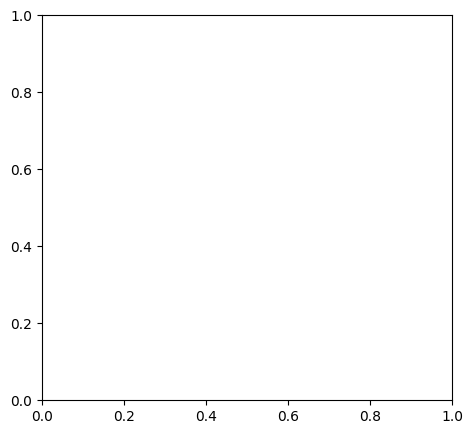

In [4]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plot_learning_curve(bagging_model, X, y, 'Curva de Aprendizado - Bagging')

plt.subplot(1, 3, 2)
plot_learning_curve(boosting_model, X, y, 'Curva de Aprendizado - Boosting (AdaBoost)')

plt.subplot(1, 3, 3)
plot_learning_curve(random_forest_model, X, y, 'Curva de Aprendizado - Random Forest')

plt.tight_layout()
plt.show()

In [5]:
# Impressão das acurácias
print(f"Acurácia do Bagging (Treino): {bagging_train_acc:.2f}, (Teste): {bagging_test_acc:.2f}")
print(f"Acurácia do Boosting (Treino): {boosting_train_acc:.2f}, (Teste): {boosting_test_acc:.2f}")
print(f"Acurácia do Random Forest (Treino): {random_forest_train_acc:.2f}, (Teste): {random_forest_test_acc:.2f}")

NameError: name 'bagging_train_acc' is not defined